In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [3]:
# Load the Boston Housing Dataset from a CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Display first few rows of the dataset
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


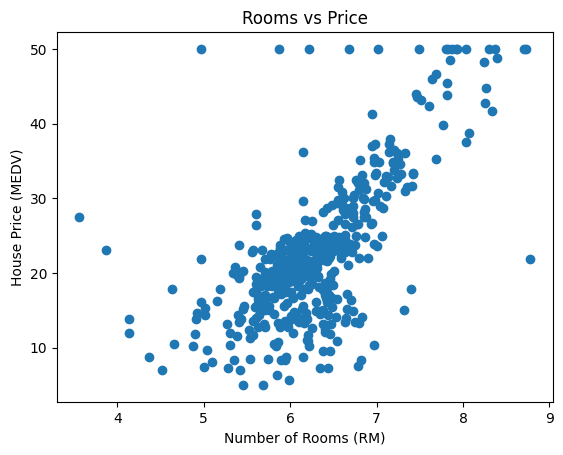

In [4]:
# Check dataset information
df.info()

# Check statistics of the dataset
df.describe()

# Visualize one feature vs. price (e.g., RM - number of rooms)
plt.scatter(df['rm'], df['medv'])
plt.xlabel("Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Rooms vs Price")
plt.show()


In [5]:
# Features (X) and Target (y)
X = df.drop('medv', axis=1)  # Drop the price column (target)
y = df['medv']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Check R-squared value
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")


Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326


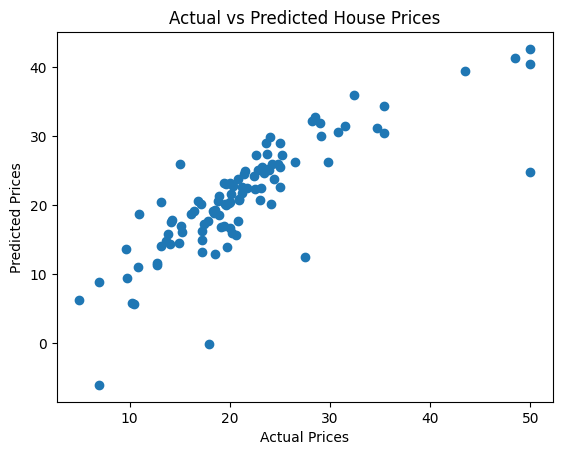

In [9]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# Define a function for input-based prediction
def predict_house_price():
    # Gather input from the user (example: input for all features)
    crim = float(input("Enter crime rate by town (CRIM): "))
    zn = float(input("Enter proportion of residential land zoned for lots over 25,000 sq. ft. (ZN): "))
    indus = float(input("Enter proportion of non-retail business acres per town (INDUS): "))
    chas = float(input("Enter Charles River dummy variable (1 if tract bounds river; 0 otherwise) (CHAS): "))
    nox = float(input("Enter nitric oxides concentration (NOX): "))
    rm = float(input("Enter average number of rooms per dwelling (RM): "))
    age = float(input("Enter proportion of owner-occupied units built prior to 1940 (AGE): "))
    dis = float(input("Enter weighted distances to five Boston employment centers (DIS): "))
    rad = float(input("Enter index of accessibility to radial highways (RAD): "))
    tax = float(input("Enter full-value property-tax rate per $10,000 (TAX): "))
    ptratio = float(input("Enter pupil-teacher ratio by town (PTRATIO): "))
    b = float(input("Enter 1000(Bk - 0.63)^2 where Bk is the proportion of black by town (B): "))
    lstat = float(input("Enter percentage lower status of the population (LSTAT): "))

    # Create a numpy array for the input
    input_features = np.array([[crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat]]) # Removed extra indentation

    # Predict the house price
    predicted_price = model.predict(input_features)

    # Output the predicted price
    print(f"Predicted house price: ${predicted_price[0] * 1000:.2f}")

# Call the function to predict house price based on user input
predict_house_price()